# 经营分析

## 拆解categories字段

In [13]:
#导入数据
import pandas as pd
data = pd.read_csv(r'E:\py_code\Data-Mining\final\Yelp\data.csv')


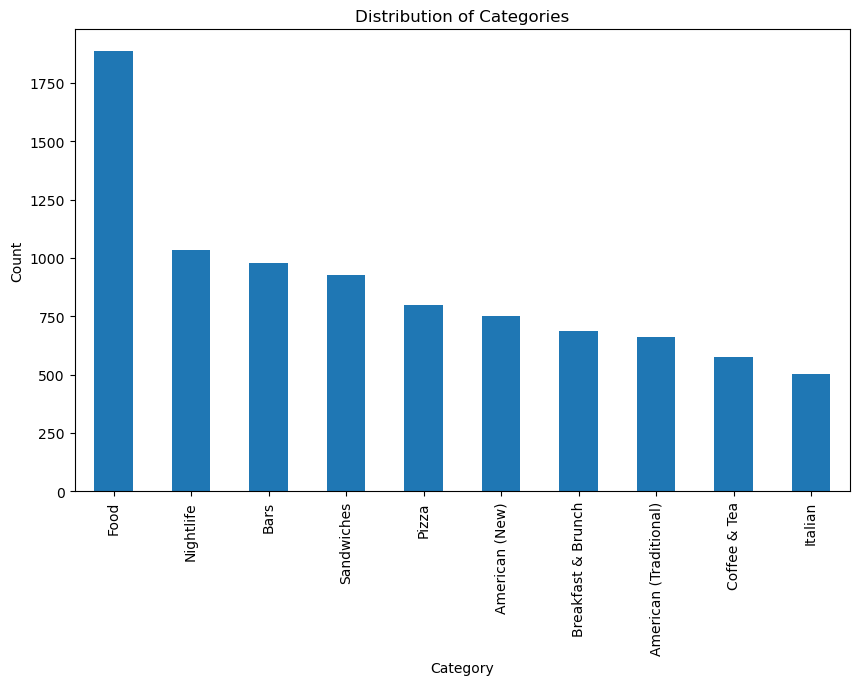

['Food',
 'Nightlife',
 'Bars',
 'Sandwiches',
 'Pizza',
 'American (New)',
 'Breakfast & Brunch',
 'American (Traditional)',
 'Coffee & Tea',
 'Italian']

In [14]:
#拆分类别
data['all_categories'] = data['categories'].str.split(', ')
all_categories = data['categories'].str.split(', ', expand=True).stack()
all_categories.value_counts()

#可视化前10个
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
all_categories.value_counts().head(10).plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#top10
top_categories = all_categories.value_counts().head(10).index.tolist()
top_categories

## 高频类别onehot编码

In [15]:
#根据top10类别进行onehot编码
for cat in top_categories:
    data[f'cat_{cat}'] = data['all_categories'].apply(lambda x: 1 if cat in x else 0)
data.head()

,business_id,name,address,latitude,longitude,stars,review_count,is_open,categories,all_categories,cat_Food,cat_Nightlife,cat_Bars,cat_Sandwiches,cat_Pizza,cat_American (New),cat_Breakfast & Brunch,cat_American (Traditional),cat_Coffee & Tea,cat_Italian
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,39.955505,-75.155564,4.0,80,1,"Food, Bubble Tea, Coffee & Tea, Bakeries","[Food, Bubble Tea, Coffee & Tea, Bakeries]",1,0,0,0,0,0,0,0,1,0
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Japanese","[Sushi Bars, Japanese]",0,0,0,0,0,0,0,0,0,0
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,39.943223,-75.162568,4.5,205,1,Korean,[Korean],0,0,0,0,0,0,0,0,0,0
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,39.939825,-75.157447,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife","[Cocktail Bars, Bars, Italian, Nightlife]",0,1,1,0,0,0,0,0,0,1
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,40.022466,-75.218314,3.0,41,0,"Pizza, Salad, Soup","[Pizza, Salad, Soup]",0,0,0,0,1,0,0,0,0,0


In [16]:
#删除无效字段
data = data.drop(columns=['business_id', 'name', 'address', 'latitude', 'longitude', 'categories', 'all_categories'])
data.head()

,stars,review_count,is_open,cat_Food,cat_Nightlife,cat_Bars,cat_Sandwiches,cat_Pizza,cat_American (New),cat_Breakfast & Brunch,cat_American (Traditional),cat_Coffee & Tea,cat_Italian
0,4.0,80,1,1,0,0,0,0,0,0,0,1,0
1,4.0,245,1,0,0,0,0,0,0,0,0,0,0
2,4.5,205,1,0,0,0,0,0,0,0,0,0,0
3,4.0,65,0,0,1,1,0,0,0,0,0,0,1
4,3.0,41,0,0,0,0,0,1,0,0,0,0,0


### 数据标准化

In [17]:
data_r = data[['stars', 'review_count']]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data[['stars', 'review_count']] = min_max_scaler.fit_transform(data[['stars', 'review_count']])
data.head()


,stars,review_count,is_open,cat_Food,cat_Nightlife,cat_Bars,cat_Sandwiches,cat_Pizza,cat_American (New),cat_Breakfast & Brunch,cat_American (Traditional),cat_Coffee & Tea,cat_Italian
0,0.750,0.013121,1,1,0,0,0,0,0,0,0,1,0
1,0.750,0.041987,1,0,0,0,0,0,0,0,0,0,0
2,0.875,0.034990,1,0,0,0,0,0,0,0,0,0,0
3,0.750,0.010497,0,0,1,1,0,0,0,0,0,0,1
4,0.500,0.006298,0,0,0,0,0,1,0,0,0,0,0


### 数据集划分

In [25]:
#调用sklearn函数
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
X = data.drop(['is_open'], axis=1)
y = data['is_open']
#划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### 逻辑回归

In [26]:
#逻辑回归模型构建
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()

#定义网格参数
param_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

#采用5折交叉验证
grid_logreg = GridSearchCV(estimator = logreg, param_grid = param_logreg, cv=5)

#拟合数据
grid_logreg.fit(X_train, y_train)

#输出最佳参数
print(grid_logreg.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [29]:
#预测结果分析
logreg_best = grid_logreg.best_estimator_
y_hat_test = logreg_best.predict(X_test)
print('逻辑回归得分')
print('Precision:{:.3f}'.format(precision_score(y_test, y_hat_test)))
print('Recall:{:.3f}'.format(recall_score(y_test, y_hat_test)))
print('F1:{:.3f}'.format(f1_score(y_test, y_hat_test)))
y_hat_test = logreg_best.predict_proba(X_test)[:,1]
print('AUC:{:.3f}'.format(roc_auc_score(y_test, y_hat_test)))

逻辑回归得分
Precision:0.621
Recall:0.931
F1:0.745
AUC:0.631
